# Dentate Gyrus

This processed Dentate Gyrus data set is downloaded from scVelo package, which is a very nice tool for RNA velocity quantification. Here, we will illustrate that the differential momentum genes could reveal biological informed trajectory, thanks to its supervised manner on informative gene detection. 

You can run this notebook with our [pre-computed data](https://sourceforge.net/projects/brie-rna/files/examples/dentateGyrus/) with these [BRIE2 command lines](https://github.com/huangyh09/brie-tutorials/blob/main/dentateGyrus/run_brie2.sh), by downloading it e.g., using the following command line and unzip it into the `./data` folder:

```bash
wget http://ufpr.dl.sourceforge.net/project/brie-rna/examples/dentateGyrus/brie2_dentateGyrus.zip
unzip -j brie2_dentateGyrus.zip -d ./data
```

## Load packages

In [1]:
import brie
import numpy as np
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

scv.logging.print_version()
print('brie version: %s' %brie.__version__)

2021-09-23 21:13:31.376208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-23 21:13:31.376238: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Running scvelo 0.2.4 (python 3.7.6) on 2021-09-23 21:13.
brie version: 2.0.6


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI's XMLRPC API is currently disabled due to unmanageable load and will be deprecated in the near future. See https://status.python.org/ for more information.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
# define the path you store the example data
# dat_dir = "./data"
dat_dir = "/home/yuanhua/research/brie2/releaseDat/dentateGyrus/"

## scVelo's default results

#### Fitting scVelo
Scvelo's stochastic and dynamical models may take a few minutes to run, so we pre-run it by the following codes, and the fitted data can be found in the downloaded zip file.

*Stochastic model*
```Python
adata = scv.datasets.dentategyrus()

scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=3000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
adata.write(dat_dir + "/dentategyrus_scvelo_stoc_3K.h5ad")
```

In [4]:
adata = scv.read(dat_dir + "/dentategyrus_scvelo_stoc_3K.h5ad")

In [5]:
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.9 0.1]


AnnData object with n_obs × n_vars = 2930 × 2894
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_colors', 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [6]:
print(np.sum(adata.var['velocity_genes']))

634


computing velocity graph (using 1/80 cores)



    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


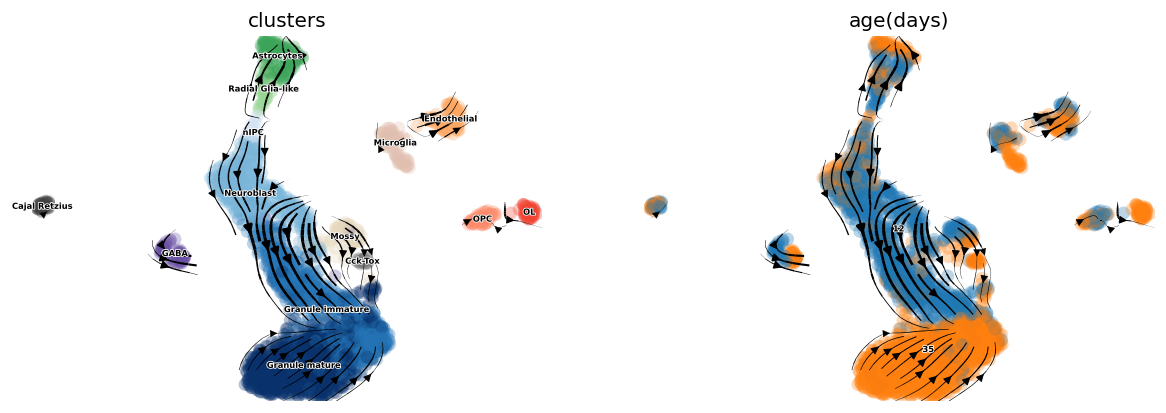

In [7]:
scv.tl.velocity_graph(adata, gene_subset=None)
scv.pl.velocity_embedding_stream(adata, basis='umap', 
                                 color=['clusters', 'age(days)'],
                                 legend_fontsize=5, dpi=60)

In [8]:
## Plotting with higher figure resolution 

# scv.pl.velocity_embedding_stream(adata, basis='umap', color=['clusters'], 
#                                  legend_fontsize=5, dpi=150, title='')

# scv.pl.velocity_embedding(adata, basis='umap', arrow_length=2, arrow_size=2, dpi=300, title='')

## BRIE2's differential momentum genes (DMGs)

Here, we aim to use BRIE2 to detect the differential momentum genes between cell types and illustrate its performance on projecting RNA velocity to cellular transitions.
The command line and design matrix are: [run_brie2.sh](https://github.com/huangyh09/brie-tutorials/blob/main/dentateGyrus/run_brie2.sh) and [dentategyrus_cluster_OL.tsv](https://github.com/huangyh09/brie-tutorials/blob/main/dentateGyrus/data/dentategyrus_cluster_OL.tsv).

### DMGs between OPC and OL

One main differentiation is between OPC and OL. So, we took out these 103 cells and run BRIE2 to detect the DMGs by testing the covariate `is_OL`.

In [9]:
adata_brie_OL = scv.read(dat_dir + "/brie_dentategyrus_cluster_subOL.h5ad")

adata_OL = adata[adata_brie_OL.obs.index, :]

Vocalno plot for DMGs between OPC and OL. cell_ceoff means effect size on logit(Psi), Psi means proportion of spliced RNAs. Positive effect size means OL has higher proportion of spliced RNAs.

Text(0.5, 1.0, 'DMGs between OPC and OL')

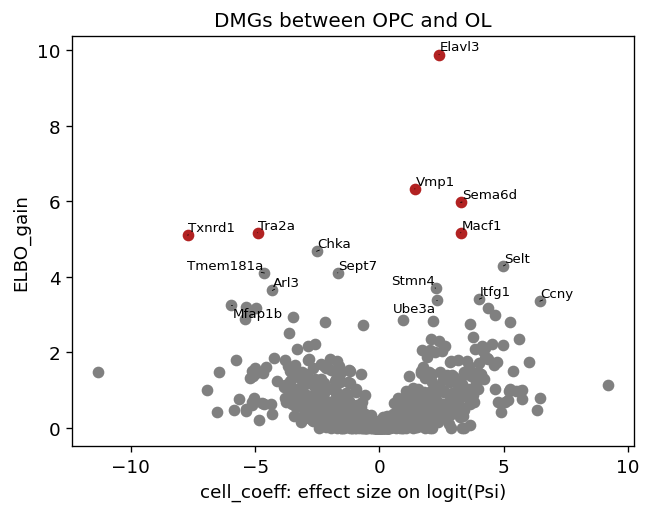

In [10]:
plt.figure(figsize=(6, 4.5), dpi=60)

brie.pl.volcano(adata_brie_OL, y='ELBO_gain', log_y=False, n_anno=16, 
                score_red=5, adjust=True)
plt.title('DMGs between OPC and OL')

plt.xlabel('cell_coeff: effect size on logit(Psi)')
plt.title('DMGs between OPC and OL')
# plt.savefig(dat_dir + '../../brie2/figures/fig_s11_vocalno_DMG_OPCvsOL.pdf', dpi=150)

In [11]:
top_genes_OL = adata_brie_OL.var.index[np.argsort(list(np.max(adata_brie_OL.varm['ELBO_gain'], axis=1)))[::-1][:100]]
top_genes_OL[:4]

Index(['Elavl3', 'Vmp1', 'Sema6d', 'Tra2a'], dtype='object', name='index')

index
Elavl3    0.310708
Vmp1     -0.736003
Sema6d   -0.358877
Tra2a    -1.474734
Name: velocity_r2, dtype: float64


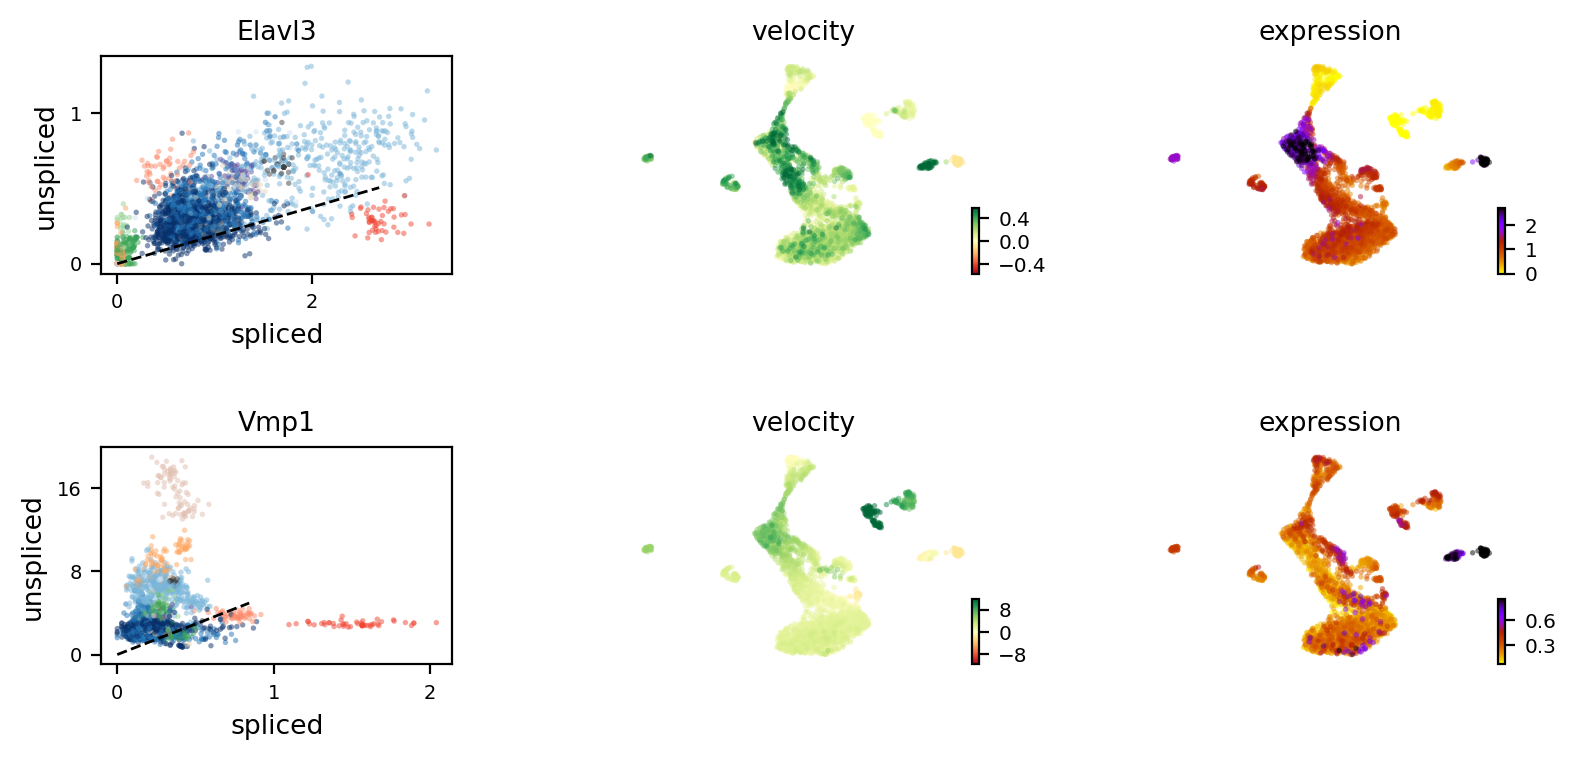

In [12]:
print(adata.var['velocity_r2'][top_genes_OL[:4]])

scv.pl.velocity(adata, var_names=top_genes_OL[:2], colorbar=True, ncols=1)

48 48
computing velocity graph (using 1/80 cores)


Trying to set attribute `.uns` of view, copying.



    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


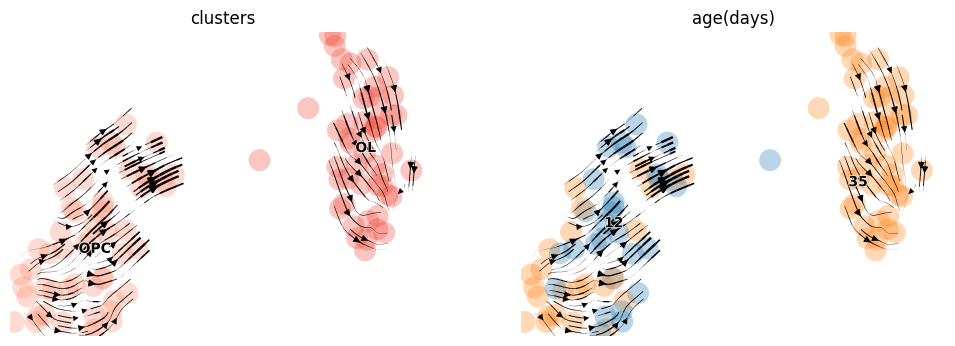

In [13]:
idx = adata_brie_OL.varm['ELBO_gain'][:, 0] > 2
gene_use = adata_brie_OL.var.index[idx]

print(len(gene_use), sum(brie.match(gene_use, adata_OL.var.index) != None))

scv.tl.velocity_graph(adata_OL, gene_subset=gene_use)
scv.pl.velocity_embedding_stream(adata_OL, basis='umap', 
                                 color=['clusters', 'age(days)'],
                                 legend_fontsize=10, dpi=50, size=1000)

634
computing velocity graph (using 1/80 cores)



    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
20 20
computing velocity graph (using 1/80 cores)



    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
48 48
computing velocity graph (using 1/80 cores)



    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
83 83
computing velocity graph (using 1/80 cores)



    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


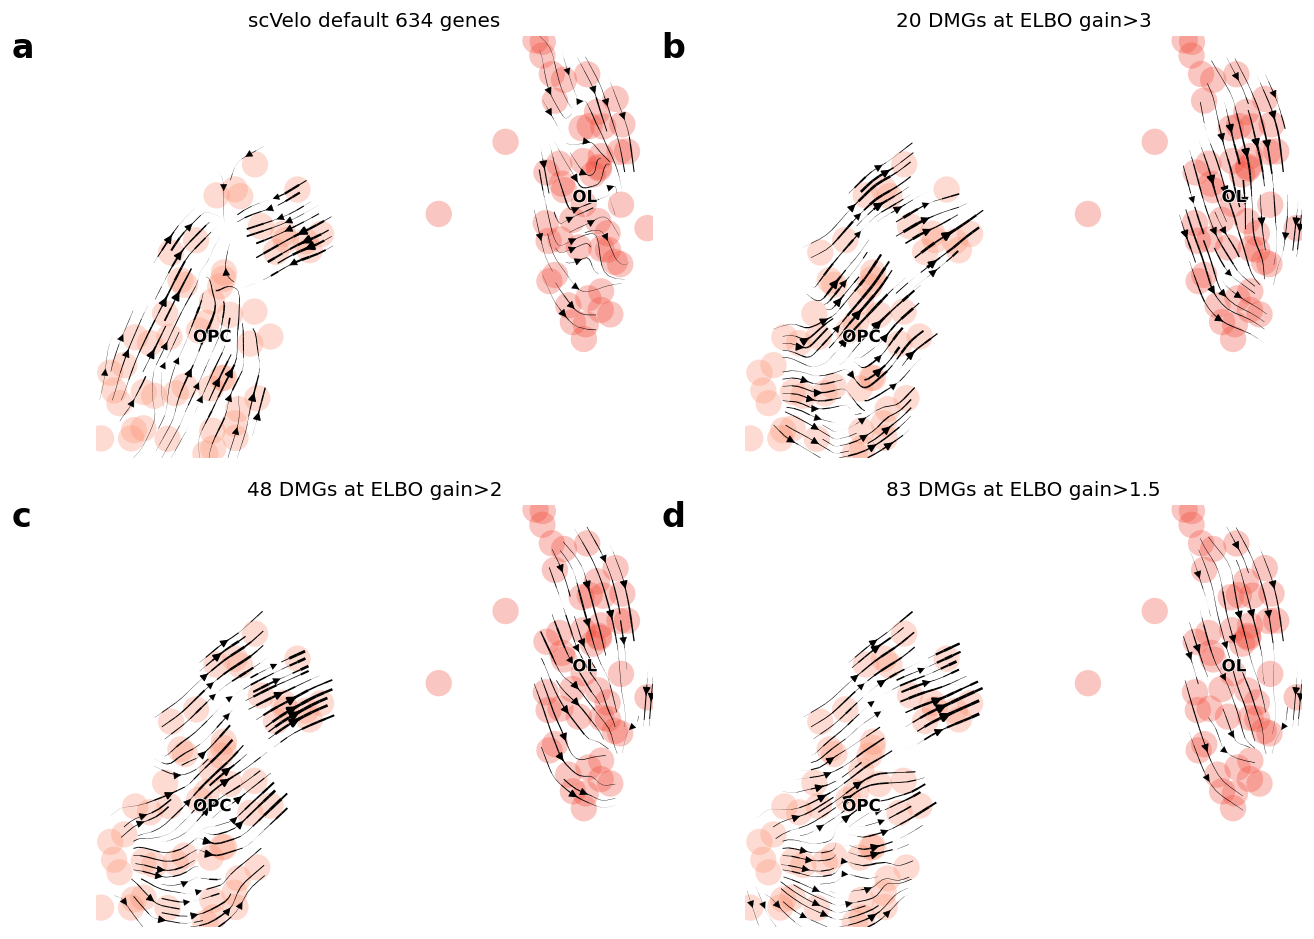

In [14]:
fig = plt.figure(figsize=(11, 8), dpi=60)
## cutoff 0.001
ax1 = plt.subplot(2, 2, 1)

print(np.sum(adata_OL.var['velocity_genes']))
idx1 = adata_OL.var['velocity_genes']
scv.tl.velocity_graph(adata_OL, gene_subset=None)
scv.pl.velocity_embedding_stream(adata_OL, basis='umap', color=['clusters'], 
                                 ax=ax1, show=False, legend_fontsize=10, size=1000, 
                                 title='scVelo default %d genes' %(sum(idx1)))
ax1.text(-0.15, 0.95, 'a', transform=ax1.transAxes, size=20, weight='bold')

## cutoff 0.05
ax1 = plt.subplot(2, 2, 2)
idx1 = adata_brie_OL.varm['ELBO_gain'][:, 0] > 3
gene_use1 = adata_brie_OL.var.index[idx1]
print(sum(idx1), sum(brie.match(gene_use1, adata_OL.var.index) != None))

scv.tl.velocity_graph(adata_OL, gene_subset=gene_use1)
scv.pl.velocity_embedding_stream(adata_OL, basis='umap', color=['clusters'], 
                                 ax=ax1, show=False, legend_fontsize=10, size=1000, 
                                 title='%d DMGs at ELBO_gain>3' %(sum(idx1)))
ax1.text(-0.15, 0.95, 'b', transform=ax1.transAxes, size=20, weight='bold')

## cutoff 0.05
ax1 = plt.subplot(2, 2, 3)

idx1 = adata_brie_OL.varm['ELBO_gain'][:, 0] > 2
gene_use1 = adata_brie_OL.var.index[idx1]
print(sum(idx1), sum(brie.match(gene_use1, adata_OL.var.index) != None))

scv.tl.velocity_graph(adata_OL, gene_subset=gene_use1)
scv.pl.velocity_embedding_stream(adata_OL, basis='umap', color=['clusters'], 
                                 ax=ax1, show=False, legend_fontsize=10, size=1000, 
                                 title='%d DMGs at ELBO_gain>2' %(sum(idx1)))
ax1.text(-0.15, 0.95, 'c', transform=ax1.transAxes, size=20, weight='bold')

## cutoff 0.05
ax1 = plt.subplot(2, 2, 4)
idx1 = adata_brie_OL.varm['ELBO_gain'][:, 0] > 1.5
gene_use1 = adata_brie_OL.var.index[idx1]
print(sum(idx1), sum(brie.match(gene_use1, adata_OL.var.index) != None))

scv.tl.velocity_graph(adata_OL, gene_subset=gene_use1)
scv.pl.velocity_embedding_stream(adata_OL, basis='umap', color=['clusters'], 
                                 ax=ax1, show=False, legend_fontsize=10, size=1000, 
                                 title='%d DMGs at ELBO_gain>1.5' %(sum(idx1)))
ax1.text(-0.15, 0.95, 'd', transform=ax1.transAxes, size=20, weight='bold')


plt.tight_layout()
# plt.savefig(dat_dir + '../../brie2/figures/fig_s12_OPLvsOL_direction.png', dpi=300)
plt.show()

### DMGs for one cell type vs the rest
We then detect the DMGs for each cell type vs the rest and use them to explore their impact on cellular transitions.

In [15]:
adata_brie = scv.read(dat_dir + "/brie_dentategyrus_cluster.h5ad")

cdr = np.array((adata_brie.X > 0).mean(0))[0, :]

adata_brie

AnnData object with n_obs × n_vars = 2930 × 2879
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version', 'clusters_colors'
    obsm: 'X_umap', 'Xc'
    varm: 'ELBO_gain', 'cell_coeff', 'fdr', 'intercept', 'pval', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'spliced', 'unspliced'

In [16]:
top_genes_brie = adata_brie.var.index[np.argsort(list(np.max(adata_brie.varm['ELBO_gain'], axis=1)))[::-1][:100]]
top_genes_brie[:4]

Index(['Celf2', 'Vmp1', 'Myl6', 'Snap25'], dtype='object', name='index')

index
Celf2     0.318048
Vmp1     -0.736003
Myl6      0.338808
Snap25   -0.970810
Name: velocity_r2, dtype: float64


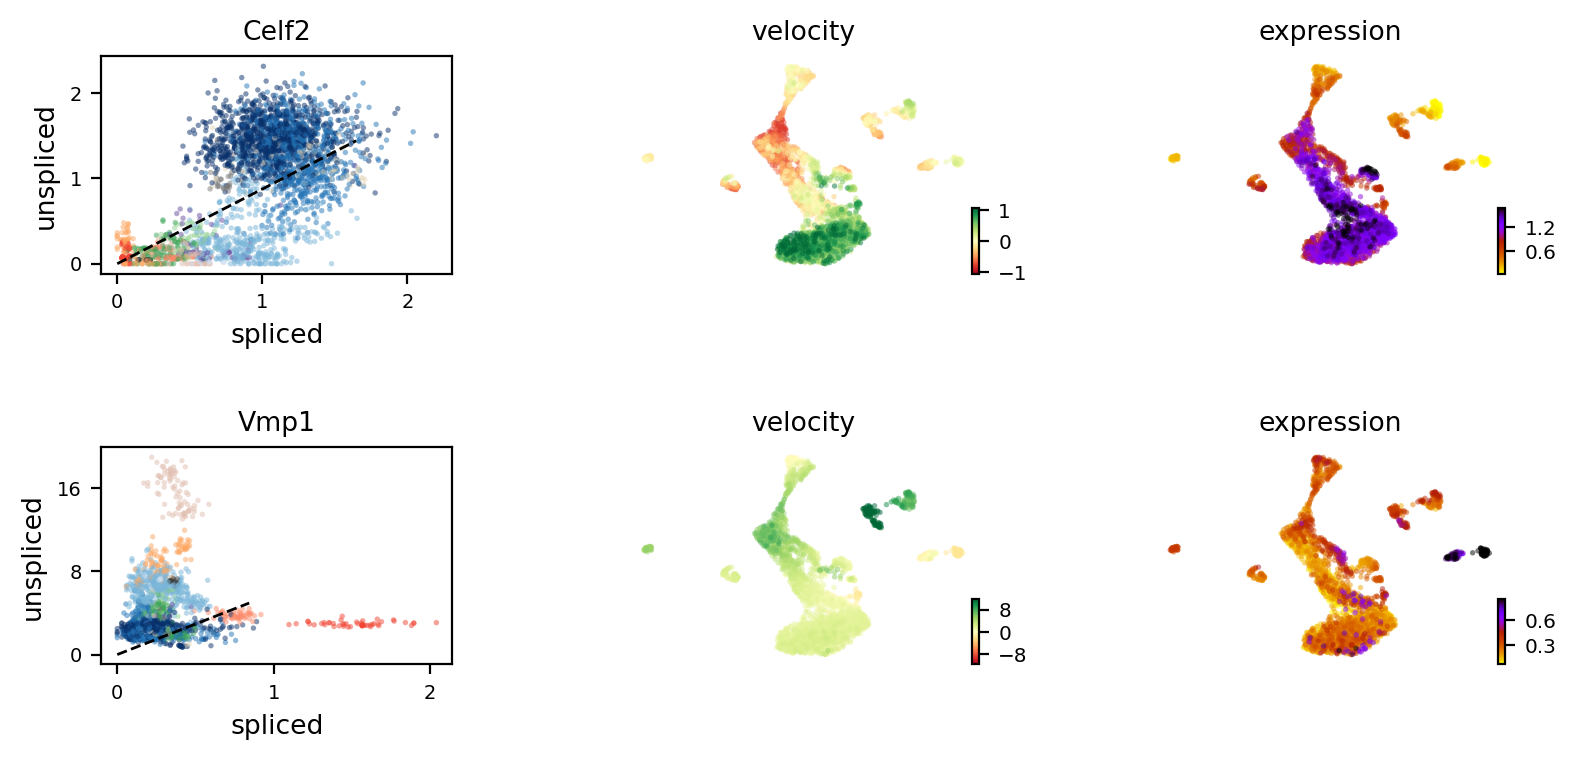

In [17]:
print(adata.var['velocity_r2'][top_genes_brie[:4]])
scv.pl.velocity(adata, var_names=top_genes_brie[:2], colorbar=True, ncols=1)

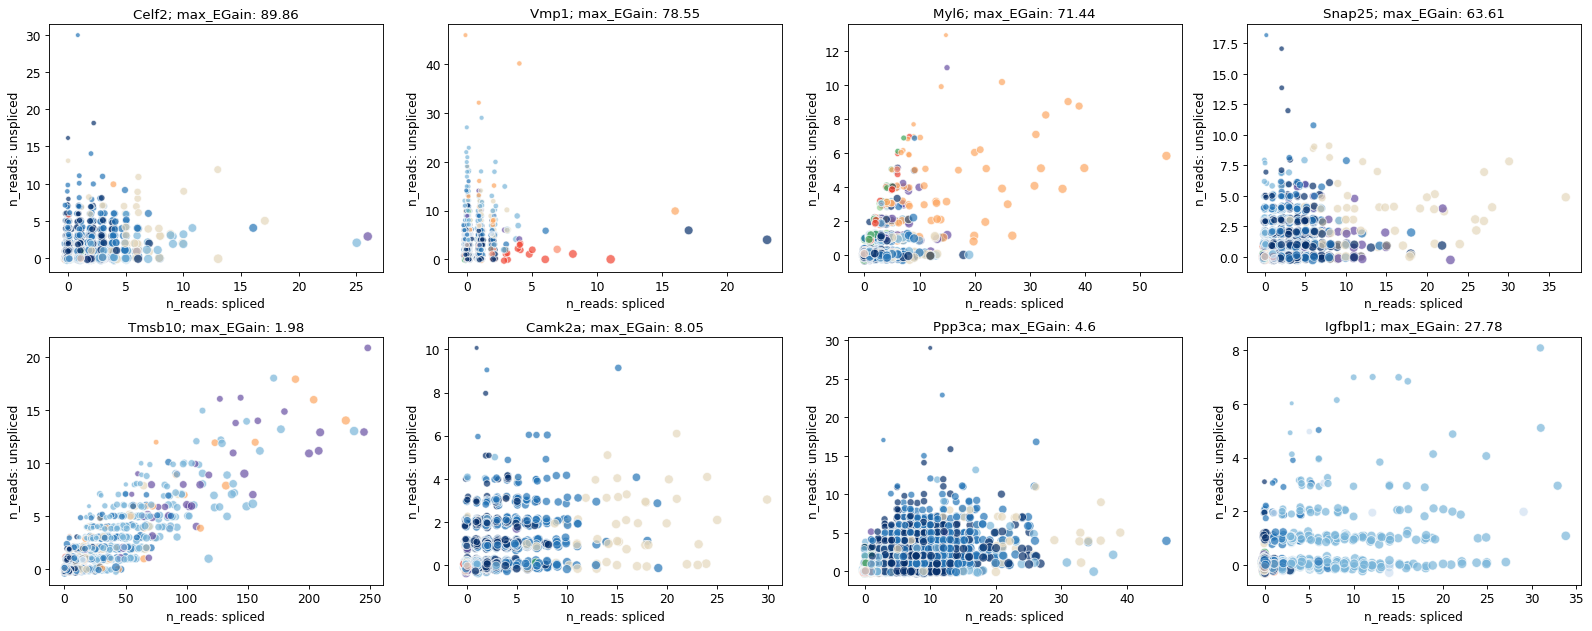

In [18]:
import seaborn as sns

scVelo_genes = ['Tmsb10', 'Camk2a', 'Ppp3ca', 'Igfbpl1']
adata_brie.varm['max_EGain'] = np.round(np.max(adata_brie.varm['ELBO_gain'], axis=1, keepdims=True), 2)

fig = plt.figure(figsize=(20, 8), dpi=40)
brie.pl.counts(adata_brie, genes=np.append(top_genes_brie[:4], scVelo_genes), 
               layers=['spliced', 'unspliced'],
               color='clusters', add_val='max_EGain', 
               nrow=2, alpha=0.7, legend=False,
               palette=sns.color_palette(adata_brie.uns['clusters_colors']),
               hue_order=np.unique(adata_brie.obs['clusters']), noise_scale=0.1)

# plt.savefig(dat_dir + '../../brie2/figures/fig_s10_DMG_counts.png', dpi=200)
plt.show()

297 297
computing velocity graph (using 1/80 cores)



    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


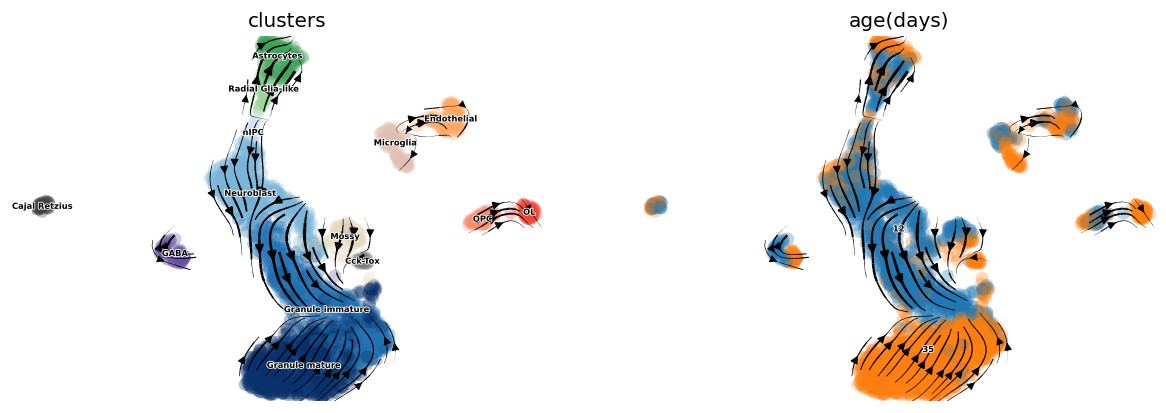

In [19]:
idx = (np.max(adata_brie.varm['ELBO_gain'], axis=1) > 5) * (cdr > 0.15)
gene_use = adata_brie.var.index[idx]

print(len(gene_use), sum(brie.match(gene_use, adata.var.index) != None))

scv.tl.velocity_graph(adata, gene_subset=gene_use)
scv.pl.velocity_embedding_stream(adata, basis='umap', 
                                 color=['clusters', 'age(days)'],
                                 legend_fontsize=5, dpi=60)

In [20]:
## Plotting with higher figure resolution 

# scv.pl.velocity_embedding_stream(adata, basis='umap', color=['clusters'], 
#                                  legend_fontsize=5, dpi=150, title='')

# scv.pl.velocity_embedding(adata, basis='umap', arrow_length=2, arrow_size=2, dpi=300, title='')

## scVelo's dynamical model

*Dynamical model*
```Python
adata = scv.datasets.dentategyrus()

scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=3000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata, var_names='all')
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.latent_time(adata)
adata.write(dat_dir + "/dentategyrus_scvelo_dyna_3K.h5ad")
```

In [21]:
adata_dyna = scv.read(dat_dir + "/dentategyrus_scvelo_dyna_3K.h5ad")

In [22]:
print(np.sum(adata_dyna.var['velocity_genes']))

1066


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


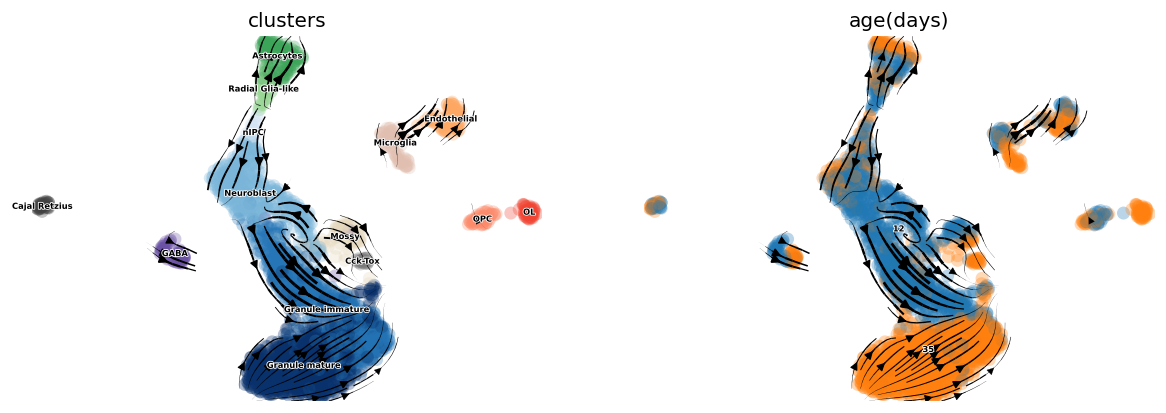

In [23]:
# scv.tl.velocity_graph(adata_dyna, gene_subset=None)
scv.pl.velocity_embedding_stream(adata_dyna, basis='umap', 
                                 color=['clusters', 'age(days)'],
                                 legend_fontsize=5, dpi=60)